# Tarea 1
## Ejercicio 1
El objetivo de las bases es que realicemos un modelo de clasificación para poder contestar la siguiente pregunta: **¿Damos un crédito bancario o no?**

### Parte 1: Exploración de las bases
Para empezar con la exploración de la base, tendrán que generar un análisis descriptivo de la información que les compartiré:

 1. Los campos _id_ que son los identificadores de la información.
 2. _base_ini_interna_.
 3. _base_ini_parte1_.
 4. _base_ini_externa_.
 5. Bases de comportamiento.
 6. _base_inversión_, que es una variable simulada de una gamma.
 7. Cuando una variable es categórica, está implícito en el nombre de la base. No tenemos un diccionario, simplemente son categóricas.
 8. El resto entonces son continuas. Es decir, los nombre estám enmascarados.

Utilizaremos _sqldf_, así que antes se debe instalar de ser necesario.

In [1]:
pip install sqldf

Note: you may need to restart the kernel to use updated packages.


A continuación se cargarán las bibliotecas que serán, muy probablemente, utilizadas.

In [2]:
#import sqlite3
import sqldf
import pandas as pd
from pylab import*
import numpy as np
import scipy.stats
from scipy.special import gamma
import seaborn as sns
from scipy.stats import beta
from scipy.stats import spearmanr
import pandas as pd

In [92]:
import matplotlib.pyplot as plt

Ahora procedemos a cargar cada una de las bases del enunciado, iniciando los primeros pasos exploratorios. De manera general, se aplicará el mismo procedimiento a cada base y después, dependiendo de los datos que cada una presente, se observarán algunos tratamientos distintos. El procedimiento default corresponde a sacar, con _info()_, un resumen general de los tipos de datos que manejan las bases. Además, con sqldf se validará que no haya id's repetido si es el caso.

In [3]:
ruta = "./data/"
bd = "base_ini_externa.txt"
bd_ini_externa = pd.read_csv(ruta+bd,sep=" ")
bd_ini_externa.head()

,_id_,comp_externo1,comp_externo2,comp_externo3,comp_externo4
0,78213,260.869565,25.854639,56.0,-230.0
1,76457,40.579710,2.872738,62.0,-230.0
2,40666,NaN,NaN,119.0,-230.0
3,8329,349.275362,34.616490,94.0,-230.0
4,68389,276.811594,27.434645,125.0,-230.0


In [4]:
bd_ini_externa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   _id_           50000 non-null  int64  
 1   comp_externo1  47831 non-null  float64
 2   comp_externo2  44410 non-null  float64
 3   comp_externo3  49994 non-null  float64
 4   comp_externo4  50000 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 1.9 MB


In [5]:
len(bd_ini_externa["_id_"].unique())

50000

Podemos observar que en esta base no hay identificadores nulos y además el número de identificadores distintos es el total de identificadores, por lo que no hay identificadores repetidos.

Sin embargo, los componentes externos 1, 2 y 3 sí tienen 2169, 5590 y 6 celdas nulas respectivamente.
**NOTA: ¿Tenemos que cambiar los null?**

In [6]:
bd="base_ini_interna.csv"
bd_ini_interna = pd.read_csv(ruta+bd)
bd_ini_interna.head()

,_id_,fecha_inicio,comp_interno1,comp_interno2,comp_interno3,comp_interno4,categoria1,categoria2,categoria3
0,78213,2020-03-25,0.000000,b'0',11.0,58.0,2.0,9.0,156.0
1,76457,2020-02-13,0.000000,b'1',28.0,45.0,1.0,4.0,173.0
2,40666,2018-01-24,0.000000,b'1',25.0,45.0,1.0,9.0,170.0
3,8329,2016-10-07,0.000000,b'1',14.0,59.0,3.0,3.0,159.0
4,68389,2019-07-30,2026.342452,b'1',1.0,67.0,2.0,9.0,146.0


In [7]:
bd_ini_interna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   _id_           50000 non-null  int64  
 1   fecha_inicio   50000 non-null  object 
 2   comp_interno1  50000 non-null  float64
 3   comp_interno2  50000 non-null  object 
 4   comp_interno3  50000 non-null  float64
 5   comp_interno4  50000 non-null  float64
 6   categoria1     50000 non-null  float64
 7   categoria2     50000 non-null  float64
 8   categoria3     50000 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 3.4+ MB


In [8]:
len(bd_ini_interna["_id_"].unique())

50000

Por lo que esta base no tiene entradas nulas, tiene el mismo número de identificadores que la base anterior y todos son distintos.

In [9]:
bd="base_ini_parte1.csv"
bd_ini_parte1 = pd.read_csv(ruta+bd)
bd_ini_parte1.head()

,_id_,_id2_,comp_mixto1
0,78213,1798899,0.33522
1,76457,1758511,0.33334
2,40666,935318,0.29186
3,8329,191567,0.29112
4,68389,1572947,0.27318


In [10]:
bd_ini_parte1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _id_         50000 non-null  int64  
 1   _id2_        50000 non-null  int64  
 2   comp_mixto1  50000 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.1 MB


In [11]:
len(bd_ini_parte1["_id_"])

50000

In [12]:
len(bd_ini_parte1["_id2_"])

50000

Por lo tanto en esta base no hay entradas con _null_ y ambos identificadores son únicos.

In [13]:
bd = "base_comportamiento_2.txt"
bd_comportamiento_2 = pd.read_csv(ruta+bd,sep=" ",low_memory=False)
bd_comportamiento_2.head()

,num_caso,mes_informacion,Tiempo_aparicion
0,1,2016-04-01 00:00:00,0.0
1,1,2016-05-01 00:00:00,1.0
2,1,2016-06-01 00:00:00,2.0
3,1,2016-07-01 00:00:00,3.0
4,1,2016-08-01 00:00:00,4.0


In [14]:
bd_comportamiento_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455536 entries, 0 to 1455535
Data columns (total 3 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   num_caso          1455536 non-null  int64  
 1   mes_informacion   1455536 non-null  object 
 2   Tiempo_aparicion  1455536 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ MB


In [15]:
len(bd_comportamiento_2["num_caso"].unique())

49352

Podemos observar que todas las llaves, en este caso _num_caso_ son no vacías. Por ejemplo, esta base (_bd_comportamiento_2_) tiene un comportamiento peculiar. Parece ser que, en resumen, registra el tiempo desde que un caso (_id_) empieza un trámite. Sin embargo, existe una duda: ¿qué pasa si un caso inicia otro procedimiento en algún momento dado? ¿se vuelve a comenzar desde cero? La siguiente consulta está pensada para que nos dé esa información, además, en el proceso, se logra que sólo aparezcan los valores únicos de los números de casos:

In [16]:
query ="""
       select num_caso,count(num_caso), max(Tiempo_aparicion) 
       from bd_comportamiento_2 group by num_caso       
       """
sqldf.run(query).head()

,num_caso,count(num_caso),max(Tiempo_aparicion)
0,1,62,61.0
1,7,29,28.0
2,8,63,51.0
3,9,15,14.0
4,10,16,15.0


La consulta en el registro 2 indica que el máximo registro del tiempo no siempre es lo mismo que la cantidad de registros que tiene un caso dado (salvo por un número que se agrega por el cero) que es lo que se esperaría. Esto es un indicativo de que , en efecto, la base puede iniciar el registro de un mismo caso más adelante en el tiempo. La siguiente consulta dice cuántas veces un caso inició un proceso:

In [17]:
query ="""
       select num_caso as _id_,count(Tiempo_aparicion) as cantidad_tramites 
       from bd_comportamiento_2 where Tiempo_aparicion=0
       group by num_caso
       """
no_tramites=sqldf.run(query)

Nótese que a no_tramites le faltan 7 casos, lo que se puede comprobar si se saca la longitud. Con algunas consultas se puede ver que esos casos que faltan son 8768	,25022,38975 ,39026,53960 ,54384,95055. Adelante, con la bdauxiliar se sabrá que se debe a que los tiempos registrados para esos casos son mayores a cero. entonces se arreglará eso y se añadirá a no_tramites

In [18]:
no_tramites.head()

,_id_,cantidad_tramites
0,1,1
1,7,1
2,8,5
3,9,1
4,10,1


In [19]:
query ="""
       select num_caso as _id_,max(mes_informacion) as ultima_fecha 
       from bd_comportamiento_2
       group by num_caso
       """
ultimafecha=sqldf.run(query)

In [20]:
ultimafecha.head(10)

,_id_,ultima_fecha
0,1,2021-05-01 00:00:00
1,7,2018-05-01 00:00:00
2,8,2021-04-01 00:00:00
3,9,2017-04-01 00:00:00
4,10,2017-05-01 00:00:00
5,14,2020-09-01 00:00:00
6,18,2021-05-01 00:00:00
7,21,2021-05-01 00:00:00
8,22,2018-12-01 00:00:00
9,24,2016-11-01 00:00:00


In [21]:
bdaux=bd_comportamiento_2.loc[bd_comportamiento_2['num_caso'].isin([8768 ,25022,38975 ,39026,53960 ,54384,95055])]
bdaux.head(20)

,num_caso,mes_informacion,Tiempo_aparicion
228077,8768,2017-05-01 00:00:00,12.0
228078,8768,2017-06-01 00:00:00,13.0
228079,8768,2017-07-01 00:00:00,14.0
228080,8768,2017-08-01 00:00:00,15.0
228081,8768,2017-09-01 00:00:00,16.0
228082,8768,2017-10-01 00:00:00,17.0
228083,8768,2017-11-01 00:00:00,18.0
228084,8768,2017-12-01 00:00:00,19.0
228085,8768,2018-01-01 00:00:00,20.0
228086,8768,2018-02-01 00:00:00,21.0


In [22]:
bdaux.sort_values(by=["num_caso","Tiempo_aparicion"]).head(20)

,num_caso,mes_informacion,Tiempo_aparicion
228077,8768,2017-05-01 00:00:00,12.0
228078,8768,2017-06-01 00:00:00,13.0
228079,8768,2017-07-01 00:00:00,14.0
228080,8768,2017-08-01 00:00:00,15.0
228081,8768,2017-09-01 00:00:00,16.0
228082,8768,2017-10-01 00:00:00,17.0
228083,8768,2017-11-01 00:00:00,18.0
228084,8768,2017-12-01 00:00:00,19.0
228085,8768,2018-01-01 00:00:00,20.0
228086,8768,2018-02-01 00:00:00,21.0


In [23]:
query=""" select num_caso,min(Tiempo_aparicion)
          from bdaux
          group by num_caso"""
bdauxiliar=sqldf.run(query)
bdauxiliar

,num_caso,min(Tiempo_aparicion)
0,8768,12.0
1,25022,1.0
2,38975,1.0
3,39026,1.0
4,53960,1.0
5,54384,1.0
6,95055,1.0


Es facil corroborar que cada uno de estos casos sólo tienen un registro, lo que servirá e un cruce para rellenar los missings. 

In [24]:
sintesis_c2=no_tramites.merge(ultimafecha,how="right",on="_id_")
sintesis_c2=sintesis_c2.fillna(1)

In [25]:
sintesis_c2.head(10)

,_id_,cantidad_tramites,ultima_fecha
0,1,1.0,2021-05-01 00:00:00
1,7,1.0,2018-05-01 00:00:00
2,8,5.0,2021-04-01 00:00:00
3,9,1.0,2017-04-01 00:00:00
4,10,1.0,2017-05-01 00:00:00
5,14,1.0,2020-09-01 00:00:00
6,18,1.0,2021-05-01 00:00:00
7,21,1.0,2021-05-01 00:00:00
8,22,1.0,2018-12-01 00:00:00
9,24,1.0,2016-11-01 00:00:00


In [26]:
query="""
      select num_caso,mes_informacion 
      from bd_comportamiento_2 
      group by num_caso,mes_informacion 
      having count(mes_informacion)>=2
"""
sqldf.run(query)

,num_caso,mes_informacion


Comportamiento_j cantidad de pagos atrasados por por mes y número de caso

In [27]:
bd = "base_comportamiento_3.csv"
bd_comportamiento_3 = pd.read_csv(ruta+bd,low_memory=False)
bd_comportamiento_3.head(10)

,num_caso,mes_informacion,comportamiento_j
0,1,2016-04-01 00:00:00,0.0
1,1,2016-05-01 00:00:00,0.0
2,1,2016-06-01 00:00:00,0.0
3,1,2016-07-01 00:00:00,0.0
4,1,2016-08-01 00:00:00,0.0
5,1,2016-09-01 00:00:00,0.0
6,1,2016-10-01 00:00:00,0.0
7,1,2016-11-01 00:00:00,0.0
8,1,2016-12-01 00:00:00,0.0
9,1,2017-01-01 00:00:00,1.0


In [28]:
bd_comportamiento_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455536 entries, 0 to 1455535
Data columns (total 3 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   num_caso          1455536 non-null  int64  
 1   mes_informacion   1455536 non-null  object 
 2   comportamiento_j  1455536 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ MB


In [29]:
query="""
      select num_caso, count(comportamiento_j) 
      from bd_comportamiento_3
      where comportamiento_j!=0
      group by num_caso
"""
sqldf.run(query).head(20)

,num_caso,count(comportamiento_j)
0,1,7
1,7,9
2,8,4
3,10,1
4,14,7
5,18,8
6,21,3
7,22,2
8,25,1
9,27,9


In [30]:
query="""
      select num_caso, avg(comportamiento_j) 
      from bd_comportamiento_3
      group by num_caso
"""
sqldf.run(query).head(20)

,num_caso,avg(comportamiento_j)
0,1,0.112903
1,7,0.827586
2,8,0.063492
3,9,0.000000
4,10,0.062500
5,14,0.125000
6,18,0.137931
7,21,0.055556
8,22,0.076923
9,24,0.000000


In [31]:
query="""select num_caso as _id_,min(mes_informacion),max(mes_informacion)
         from bd_comportamiento_3
         group by num_caso"""
olvidada =sqldf.run(query)
olvidada.head()

,_id_,min(mes_informacion),max(mes_informacion)
0,1,2016-04-01 00:00:00,2021-05-01 00:00:00
1,7,2016-01-01 00:00:00,2018-05-01 00:00:00
2,8,2016-02-01 00:00:00,2021-04-01 00:00:00
3,9,2016-02-01 00:00:00,2017-04-01 00:00:00
4,10,2016-02-01 00:00:00,2017-05-01 00:00:00


In [32]:
query1="""select 
         num_caso,
         mes_informacion,
         comportamiento_j
         from bd_comportamiento_3
         order by num_caso,mes_informacion
         """
baseji=sqldf.run(query1).groupby("num_caso").tail(12)

In [33]:
baseji.reset_index(level=None, drop=True, inplace=True, col_level=0, col_fill='')
baseji.head(20)

,num_caso,mes_informacion,comportamiento_j
0,1,2020-06-01 00:00:00,0.0
1,1,2020-07-01 00:00:00,0.0
2,1,2020-08-01 00:00:00,0.0
3,1,2020-09-01 00:00:00,0.0
4,1,2020-10-01 00:00:00,0.0
5,1,2020-11-01 00:00:00,0.0
6,1,2020-12-01 00:00:00,0.0
7,1,2021-01-01 00:00:00,0.0
8,1,2021-02-01 00:00:00,0.0
9,1,2021-03-01 00:00:00,1.0


In [162]:
query="""select 
         num_caso as _id_,         
         avg(comportamiento_j),
         max(comportamiento_j)
         from baseji
         group by num_caso
         """
sintesis_c3=sqldf.run(query)

In [163]:
sintesis_c3.head(10)

,_id_,avg(comportamiento_j),max(comportamiento_j)
0,1,0.083333,1.0
1,7,0.166667,1.0
2,8,0.083333,1.0
3,9,0.000000,0.0
4,10,0.083333,1.0
5,14,0.083333,1.0
6,18,0.250000,1.0
7,21,0.000000,0.0
8,22,0.000000,0.0
9,24,0.000000,0.0


In [36]:
query="""
     select num_caso,count(comportamiento_j),comportamiento_j
     from baseji
     group by num_caso,comportamiento_j
"""
deuda=sqldf.run(query)
deuda.head(30)

,num_caso,count(comportamiento_j),comportamiento_j
0,1,11,0.0
1,1,1,1.0
2,7,10,0.0
3,7,2,1.0
4,8,11,0.0
5,8,1,1.0
6,9,12,0.0
7,10,11,0.0
8,10,1,1.0
9,14,11,0.0


Vamos a inicializar el data frame de los registros de deuda, o cantidad de veces que el número de cliente aparece con deuda 
en K meses, $$k \in \{0,1,2,3,4,... \}$$ 

Lo llenamos con ceros para ir iterando sobre cada número de cliente y las deudas que va teniendo a lo largo del tiempo.

In [37]:
constructo=sintesis_c3[["_id_"]]
premade="_meses_deuda"
for i in range(0,int(deuda[["comportamiento_j"]].max().iloc[0])+1):
    especifico=str(i)
    constructo.loc[:,especifico+premade]=0
constructo.head()

,_id_,0_meses_deuda,1_meses_deuda,2_meses_deuda,3_meses_deuda,4_meses_deuda,5_meses_deuda,6_meses_deuda,7_meses_deuda,8_meses_deuda,9_meses_deuda,10_meses_deuda,11_meses_deuda,12_meses_deuda,13_meses_deuda,14_meses_deuda,15_meses_deuda,16_meses_deuda,17_meses_deuda,18_meses_deuda
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
premade="_meses_deuda"
paso_anterior=0
for i in range(0,len(deuda)):
    paso_actual=deuda.iloc[i,0]
    if paso_actual==paso_anterior:
        especifico=str(int(deuda.iloc[i,2]))
        constructo.loc[vector_auxiliar,especifico+premade]=deuda.iloc[i,1]
    else:
        vector_auxiliar=(constructo["_id_"]==paso_actual)
        especifico=str(int(deuda.iloc[i,2]))
        constructo.loc[vector_auxiliar,especifico+premade]=deuda.iloc[i,1]
        paso_anterior=paso_actual  
        

In [39]:
constructo.columns=["_id_","cero_meses","uno_meses","dos_meses","tres_meses","cuatro_meses","cinco_meses","seis_meses","siete_meses","ocho_meses","nueve_meses","diez_meses","once_meses","doce_meses","trece_meses","catorce_meses","quince_meses","dseis_meses","dsiete_meses","docho_meses"]

In [40]:
constructo.head(15)

,_id_,cero_meses,uno_meses,dos_meses,tres_meses,cuatro_meses,cinco_meses,seis_meses,siete_meses,ocho_meses,nueve_meses,diez_meses,once_meses,doce_meses,trece_meses,catorce_meses,quince_meses,dseis_meses,dsiete_meses,docho_meses
0,1,11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7,10,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,8,11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,10,11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,14,11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,18,9,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,21,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,22,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,24,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
query="""
        select _id_,
        cero_meses,
        uno_meses,
        dos_meses,
        tres_meses,
        cuatro_meses,
        cinco_meses,
        seis_meses,
        siete_meses,
        ocho_meses,
        nueve_meses,
        diez_meses,
        once_meses,
        doce_meses+trece_meses+catorce_meses+quince_meses+dseis_meses+dsiete_meses+docho_meses as doce_o_mas
        from constructo
"""
cons_aux=sqldf.run(query)

In [42]:
cons_aux.head(15)

,_id_,cero_meses,uno_meses,dos_meses,tres_meses,cuatro_meses,cinco_meses,seis_meses,siete_meses,ocho_meses,nueve_meses,diez_meses,once_meses,doce_o_mas
0,1,11,1,0,0,0,0,0,0,0,0,0,0,0
1,7,10,2,0,0,0,0,0,0,0,0,0,0,0
2,8,11,1,0,0,0,0,0,0,0,0,0,0,0
3,9,12,0,0,0,0,0,0,0,0,0,0,0,0
4,10,11,1,0,0,0,0,0,0,0,0,0,0,0
5,14,11,1,0,0,0,0,0,0,0,0,0,0,0
6,18,9,3,0,0,0,0,0,0,0,0,0,0,0
7,21,12,0,0,0,0,0,0,0,0,0,0,0,0
8,22,12,0,0,0,0,0,0,0,0,0,0,0,0
9,24,4,0,0,0,0,0,0,0,0,0,0,0,0


En esta consulta vemos el promedio de incumplimiento de pago del último año, junto con la cantidad de registros que cada cliente tiene con $n$ meses de deuda. $$n \in \{0,1,2,...,+12  \}$$

In [164]:
sintesis_c3_aux=sintesis_c3.merge(cons_aux,how="inner",on="_id_")
sintesis_c3_aux.head(15)

,_id_,avg(comportamiento_j),max(comportamiento_j),cero_meses,uno_meses,dos_meses,tres_meses,cuatro_meses,cinco_meses,seis_meses,siete_meses,ocho_meses,nueve_meses,diez_meses,once_meses,doce_o_mas
0,1,0.083333,1.0,11,1,0,0,0,0,0,0,0,0,0,0,0
1,7,0.166667,1.0,10,2,0,0,0,0,0,0,0,0,0,0,0
2,8,0.083333,1.0,11,1,0,0,0,0,0,0,0,0,0,0,0
3,9,0.000000,0.0,12,0,0,0,0,0,0,0,0,0,0,0,0
4,10,0.083333,1.0,11,1,0,0,0,0,0,0,0,0,0,0,0
5,14,0.083333,1.0,11,1,0,0,0,0,0,0,0,0,0,0,0
6,18,0.250000,1.0,9,3,0,0,0,0,0,0,0,0,0,0,0
7,21,0.000000,0.0,12,0,0,0,0,0,0,0,0,0,0,0,0
8,22,0.000000,0.0,12,0,0,0,0,0,0,0,0,0,0,0,0
9,24,0.000000,0.0,4,0,0,0,0,0,0,0,0,0,0,0,0


**REVISAR**

In [44]:
bd="base_inversion.txt"
bd_base_inversion= pd.read_csv(ruta+bd,sep=" ")
bd_base_inversion.head()

,_id2_,inversion
0,1758511,0.041039
1,1572947,77.422135
2,1051836,90.539953
3,1223255,90.205018
4,1894602,1.071354


In [45]:
bd_base_inversion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17536 entries, 0 to 17535
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   _id2_      17536 non-null  int64  
 1   inversion  17536 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 274.1 KB


In [46]:
len(bd_base_inversion["_id2_"].unique())

17536

In [47]:
bd="base_ini_parte1.csv"
bd_ini_parte1= pd.read_csv(ruta+bd)
bd_ini_parte1.head()

,_id_,_id2_,comp_mixto1
0,78213,1798899,0.33522
1,76457,1758511,0.33334
2,40666,935318,0.29186
3,8329,191567,0.29112
4,68389,1572947,0.27318


In [48]:
bd_ini_parte1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _id_         50000 non-null  int64  
 1   _id2_        50000 non-null  int64  
 2   comp_mixto1  50000 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.1 MB


In [49]:
len(bd_ini_parte1["_id_"].unique())

50000

In [50]:
len(bd_ini_parte1["_id2_"].unique())

50000

Los nombres de las bases que nos interesa cruzar son (con las respectivas columnas que nos podrían servir):
1.- bd_ini_externa (_id_)
2.- bd_ini_interna (_id_)
3.- bd_ini_parte1 (_id_ y _id2_)
4.- sintesis_c2 (_id_)
5.- sintesis_c3_aux (_id_)
6.- base_inversion (_id2_)


In [165]:
#merge de bd_ini_externa con bd_ini_interna
base_general=bd_ini_externa.merge(bd_ini_interna,how='inner',on='_id_')
base_general=base_general.sort_values('_id_')
base_general.head(10)

,_id_,comp_externo1,comp_externo2,comp_externo3,comp_externo4,fecha_inicio,comp_interno1,comp_interno2,comp_interno3,comp_interno4,categoria1,categoria2,categoria3
26635,1,217.391304,21.545533,102.0,-230.0,2016-03-31,3039.513678,b'1',26.0,67.0,3.0,3.0,171.0
20520,7,468.115942,21.674806,108.0,-230.0,2016-01-19,1547.112462,b'1',28.0,75.0,1.0,11.0,173.0
9400,8,371.884058,36.857225,125.0,-230.0,2016-02-10,1215.805471,b'1',14.0,55.0,2.0,6.0,159.0
15618,9,85.507246,6.274059,105.0,-230.0,2016-02-18,0.000000,b'1',11.0,55.0,2.0,9.0,156.0
10561,10,72.463768,7.181844,92.0,-230.0,2016-02-18,0.000000,b'1',11.0,56.0,2.0,6.0,156.0
6760,14,747.826087,74.116633,117.0,-230.0,2016-02-11,0.000000,b'1',19.0,68.0,4.0,3.0,164.0
38571,18,307.246377,30.451020,122.0,-230.0,2016-08-16,0.000000,b'1',14.0,50.0,2.0,5.0,159.0
10942,21,202.898551,18.672795,126.0,-230.0,2016-11-23,0.000000,b'0',14.0,75.0,2.0,9.0,159.0
42700,22,579.710145,57.454754,36.0,-230.0,2016-11-16,1317.122594,b'1',11.0,53.0,2.0,9.0,156.0
8115,24,37.681159,3.734559,131.0,-230.0,2016-06-13,0.000000,b'1',19.0,52.0,3.0,3.0,164.0


In [166]:
base_auxiliar=sintesis_c2.merge(sintesis_c3_aux,how='inner',on='_id_')
base_auxiliar.head(10)

,_id_,cantidad_tramites,ultima_fecha,avg(comportamiento_j),max(comportamiento_j),cero_meses,uno_meses,dos_meses,tres_meses,cuatro_meses,cinco_meses,seis_meses,siete_meses,ocho_meses,nueve_meses,diez_meses,once_meses,doce_o_mas
0,1,1.0,2021-05-01 00:00:00,0.083333,1.0,11,1,0,0,0,0,0,0,0,0,0,0,0
1,7,1.0,2018-05-01 00:00:00,0.166667,1.0,10,2,0,0,0,0,0,0,0,0,0,0,0
2,8,5.0,2021-04-01 00:00:00,0.083333,1.0,11,1,0,0,0,0,0,0,0,0,0,0,0
3,9,1.0,2017-04-01 00:00:00,0.000000,0.0,12,0,0,0,0,0,0,0,0,0,0,0,0
4,10,1.0,2017-05-01 00:00:00,0.083333,1.0,11,1,0,0,0,0,0,0,0,0,0,0,0
5,14,1.0,2020-09-01 00:00:00,0.083333,1.0,11,1,0,0,0,0,0,0,0,0,0,0,0
6,18,1.0,2021-05-01 00:00:00,0.250000,1.0,9,3,0,0,0,0,0,0,0,0,0,0,0
7,21,1.0,2021-05-01 00:00:00,0.000000,0.0,12,0,0,0,0,0,0,0,0,0,0,0,0
8,22,1.0,2018-12-01 00:00:00,0.000000,0.0,12,0,0,0,0,0,0,0,0,0,0,0,0
9,24,1.0,2016-11-01 00:00:00,0.000000,0.0,4,0,0,0,0,0,0,0,0,0,0,0,0


In [167]:
#cruzando la base generada con la de síntesis de los comportamientos 
base_general_2=base_general.merge(base_auxiliar,how='left',on='_id_')
len(base_general)

50000

In [168]:
base_general_2.head()

,_id_,comp_externo1,comp_externo2,comp_externo3,comp_externo4,fecha_inicio,comp_interno1,comp_interno2,comp_interno3,comp_interno4,...,tres_meses,cuatro_meses,cinco_meses,seis_meses,siete_meses,ocho_meses,nueve_meses,diez_meses,once_meses,doce_o_mas
0,1,217.391304,21.545533,102.0,-230.0,2016-03-31,3039.513678,b'1',26.0,67.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7,468.115942,21.674806,108.0,-230.0,2016-01-19,1547.112462,b'1',28.0,75.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8,371.884058,36.857225,125.0,-230.0,2016-02-10,1215.805471,b'1',14.0,55.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9,85.507246,6.274059,105.0,-230.0,2016-02-18,0.000000,b'1',11.0,55.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10,72.463768,7.181844,92.0,-230.0,2016-02-18,0.000000,b'1',11.0,56.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [169]:
base_general_3=base_general_2.merge(bd_ini_parte1,how="inner",on="_id_")
base_general_3.head(10)

,_id_,comp_externo1,comp_externo2,comp_externo3,comp_externo4,fecha_inicio,comp_interno1,comp_interno2,comp_interno3,comp_interno4,...,cinco_meses,seis_meses,siete_meses,ocho_meses,nueve_meses,diez_meses,once_meses,doce_o_mas,_id2_,comp_mixto1
0,1,217.391304,21.545533,102.0,-230.0,2016-03-31,3039.513678,b'1',26.0,67.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23,0.38000
1,7,468.115942,21.674806,108.0,-230.0,2016-01-19,1547.112462,b'1',28.0,75.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,161,0.33360
2,8,371.884058,36.857225,125.0,-230.0,2016-02-10,1215.805471,b'1',14.0,55.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,184,0.27898
3,9,85.507246,6.274059,105.0,-230.0,2016-02-18,0.000000,b'1',11.0,55.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,207,0.38000
4,10,72.463768,7.181844,92.0,-230.0,2016-02-18,0.000000,b'1',11.0,56.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,230,0.37050
5,14,747.826087,74.116633,117.0,-230.0,2016-02-11,0.000000,b'1',19.0,68.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,322,0.30032
6,18,307.246377,30.451020,122.0,-230.0,2016-08-16,0.000000,b'1',14.0,50.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,414,0.35290
7,21,202.898551,18.672795,126.0,-230.0,2016-11-23,0.000000,b'0',14.0,75.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,483,0.32000
8,22,579.710145,57.454754,36.0,-230.0,2016-11-16,1317.122594,b'1',11.0,53.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,506,0.34000
9,24,37.681159,3.734559,131.0,-230.0,2016-06-13,0.000000,b'1',19.0,52.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,552,0.32712


In [170]:
base_general_4=base_general_3.merge(bd_base_inversion,how="left",on="_id2_")

In [171]:
base_general_4.head(10)

,_id_,comp_externo1,comp_externo2,comp_externo3,comp_externo4,fecha_inicio,comp_interno1,comp_interno2,comp_interno3,comp_interno4,...,seis_meses,siete_meses,ocho_meses,nueve_meses,diez_meses,once_meses,doce_o_mas,_id2_,comp_mixto1,inversion
0,1,217.391304,21.545533,102.0,-230.0,2016-03-31,3039.513678,b'1',26.0,67.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23,0.38000,52.500490
1,7,468.115942,21.674806,108.0,-230.0,2016-01-19,1547.112462,b'1',28.0,75.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,161,0.33360,0.047480
2,8,371.884058,36.857225,125.0,-230.0,2016-02-10,1215.805471,b'1',14.0,55.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,184,0.27898,227.537211
3,9,85.507246,6.274059,105.0,-230.0,2016-02-18,0.000000,b'1',11.0,55.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,207,0.38000,0.921995
4,10,72.463768,7.181844,92.0,-230.0,2016-02-18,0.000000,b'1',11.0,56.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,230,0.37050,39.259568
5,14,747.826087,74.116633,117.0,-230.0,2016-02-11,0.000000,b'1',19.0,68.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,322,0.30032,11.923512
6,18,307.246377,30.451020,122.0,-230.0,2016-08-16,0.000000,b'1',14.0,50.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,414,0.35290,10.205613
7,21,202.898551,18.672795,126.0,-230.0,2016-11-23,0.000000,b'0',14.0,75.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,483,0.32000,NaN
8,22,579.710145,57.454754,36.0,-230.0,2016-11-16,1317.122594,b'1',11.0,53.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,506,0.34000,131.367806
9,24,37.681159,3.734559,131.0,-230.0,2016-06-13,0.000000,b'1',19.0,52.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,552,0.32712,243.223687


In [67]:
len(base_general_4)

50000


### Parte 3: Análisis
¿Qué análisis podemos realizar?

In [93]:
sns.pairplot(base_general_4)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x00000162D07EB8B0> (for post_execute):


KeyboardInterrupt: 

In [173]:
base_general_4.describe().iloc[:,1:14]

,comp_externo1,comp_externo2,comp_externo3,comp_externo4,comp_interno1,comp_interno3,comp_interno4,categoria1,categoria2,categoria3,cantidad_tramites,avg(comportamiento_j),max(comportamiento_j)
count,4.783100e+04,44410.000000,49994.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,49352.000000,49352.000000,49352.000000
mean,6.225529e+02,37.622182,66.380146,3.175998e+08,1058.571975,14.663740,56.537440,1.842300,8.034660,159.663740,1.148282,0.197507,0.863653
std,1.763822e+04,40.462078,140.022729,1.753622e+09,5050.133027,8.816343,10.051582,0.939685,2.036502,8.816343,0.706610,0.588814,1.328419
min,0.000000e+00,0.000287,-609.000000,-2.300000e+02,0.000000,1.000000,24.000000,1.000000,1.000000,146.000000,1.000000,0.000000,0.000000
25%,1.304348e+02,11.778225,72.000000,-2.300000e+02,0.000000,8.000000,48.000000,1.000000,8.000000,153.000000,1.000000,0.000000,0.000000
50%,2.637681e+02,23.613904,99.000000,-2.300000e+02,0.000000,15.000000,55.000000,2.000000,9.000000,160.000000,1.000000,0.083333,1.000000
75%,5.434783e+02,49.123815,120.000000,-2.300000e+02,1013.171226,21.000000,64.000000,2.000000,9.000000,166.000000,1.000000,0.166667,1.000000
max,2.898551e+06,861.821316,159.000000,1.000000e+10,329483.282675,32.000000,79.000000,6.000000,13.000000,177.000000,9.000000,7.666667,18.000000


In [175]:
base_general_4.describe().iloc[:, 14:27]

,cero_meses,uno_meses,dos_meses,tres_meses,cuatro_meses,cinco_meses,seis_meses,siete_meses,ocho_meses,nueve_meses,diez_meses,once_meses,doce_o_mas
count,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000
mean,9.542045,1.065387,0.095052,0.065367,0.033332,0.026281,0.022613,0.020607,0.018621,0.017102,0.000709,0.000061,0.000203
std,2.790747,1.091153,0.525053,0.428634,0.203223,0.173111,0.154023,0.146005,0.139609,0.131051,0.027372,0.007796,0.026247
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,11.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,12.000000,10.000000,12.000000,12.000000,4.000000,7.000000,3.000000,3.000000,4.000000,2.000000,2.000000,1.000000,4.000000


In [176]:
base_general_4.describe().iloc[:,27:]

,_id2_,comp_mixto1,inversion
count,5.000000e+04,50000.000000,17536.000000
mean,1.140079e+06,0.337124,185.947907
std,6.560065e+05,0.037864,959.300995
min,2.300000e+01,0.200000,0.000012
25%,5.741548e+05,0.314540,6.089411
50%,1.140306e+06,0.344530,28.605572
75%,1.706146e+06,0.369240,133.862728
max,2.276931e+06,0.430060,95052.396733


In [177]:
baseparcial1=base_general_4.iloc[:,1:17]
baseparcial1.head(5)

,comp_externo1,comp_externo2,comp_externo3,comp_externo4,fecha_inicio,comp_interno1,comp_interno2,comp_interno3,comp_interno4,categoria1,categoria2,categoria3,cantidad_tramites,ultima_fecha,avg(comportamiento_j),max(comportamiento_j)
0,217.391304,21.545533,102.0,-230.0,2016-03-31,3039.513678,b'1',26.0,67.0,3.0,3.0,171.0,1.0,2021-05-01 00:00:00,0.083333,1.0
1,468.115942,21.674806,108.0,-230.0,2016-01-19,1547.112462,b'1',28.0,75.0,1.0,11.0,173.0,1.0,2018-05-01 00:00:00,0.166667,1.0
2,371.884058,36.857225,125.0,-230.0,2016-02-10,1215.805471,b'1',14.0,55.0,2.0,6.0,159.0,5.0,2021-04-01 00:00:00,0.083333,1.0
3,85.507246,6.274059,105.0,-230.0,2016-02-18,0.000000,b'1',11.0,55.0,2.0,9.0,156.0,1.0,2017-04-01 00:00:00,0.000000,0.0
4,72.463768,7.181844,92.0,-230.0,2016-02-18,0.000000,b'1',11.0,56.0,2.0,6.0,156.0,1.0,2017-05-01 00:00:00,0.083333,1.0


In [178]:
baseparcial2=base_general_4.iloc[:,17:30]
baseparcial2.head(5)

,cero_meses,uno_meses,dos_meses,tres_meses,cuatro_meses,cinco_meses,seis_meses,siete_meses,ocho_meses,nueve_meses,diez_meses,once_meses,doce_o_mas
0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [180]:
baseparcial3=base_general_4.iloc[:,30:]
baseparcial3.head(5)

,_id2_,comp_mixto1,inversion
0,23,0.38000,52.500490
1,161,0.33360,0.047480
2,184,0.27898,227.537211
3,207,0.38000,0.921995
4,230,0.37050,39.259568


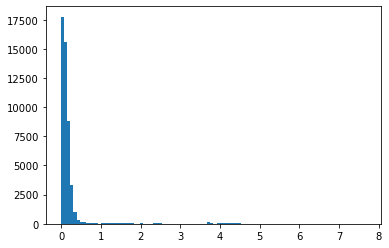

In [105]:
plt.hist(base_general_4[["avg(comportamiento_j)"]],bins=100)
plt.show()

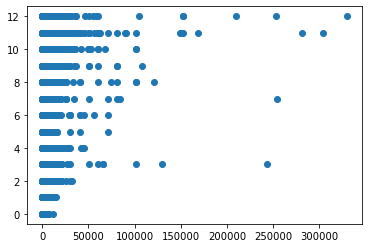

In [126]:
plt.scatter(base_general_4[["comp_interno1"]],base_general_4[["cero_meses"]])

Se puede observar que las sumas mas grandes de dinero que fueron invertidas fueron aportadas por las personas que a lo mas acumularon 3 meses de deuda (es decir, aquellos que estuvieron al corriente por 9 o mas meses)

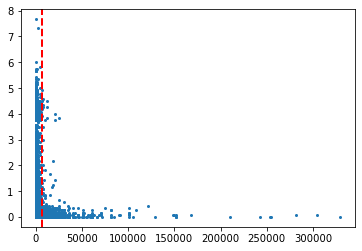

In [157]:
plt.scatter(base_general_4[["comp_interno1"]],base_general_4[["avg(comportamiento_j)"]],s=4)
axvline(x=base_general_4["comp_interno1"].quantile(.975),color='red', linestyle='--',linewidth=2)
plt.show()

Se puede observar que un componen

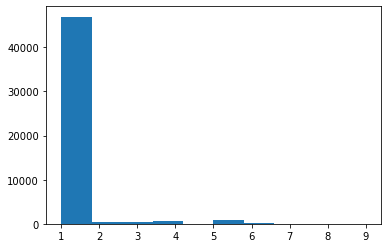

In [159]:
plt.hist(base_general_4[["cantidad_tramites"]])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

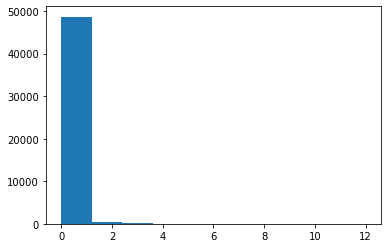

In [161]:
plt.hist(base_general_4[["tres_meses"]])
plt.show